In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# coding:utf8

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdpr
from sklearn.preprocessing import MinMaxScaler,StandardScaler # 归一化 标准化
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # 标签编码 独热编码
from sklearn.preprocessing import Normalizer # 正规化(l1,l2)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 降维
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
df = pd.read_csv("../input/HR_comma_sep.csv")

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
pdpro = pdpr.ProfileReport(df)

In [7]:
pdpro

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


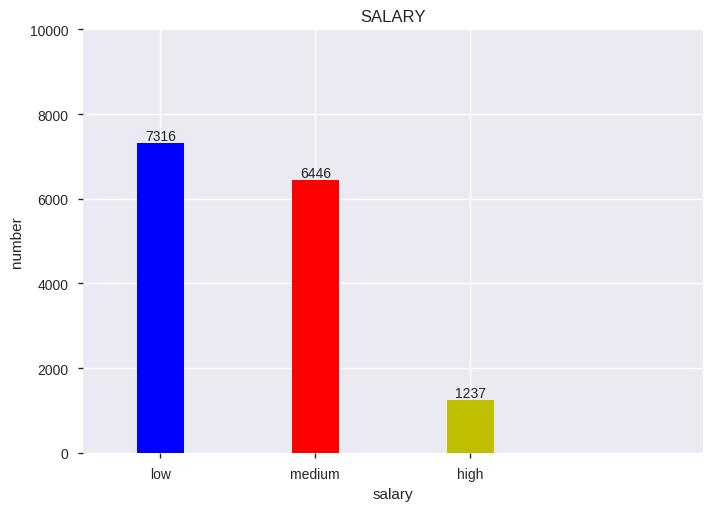

In [8]:
plt.title('SALARY')
plt.xlabel('salary')
plt.ylabel('number')
plt.axis([0,4,0,10000])
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.3,color = 'bry')
for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va = 'bottom')

* sns 绘制直方图柱状图

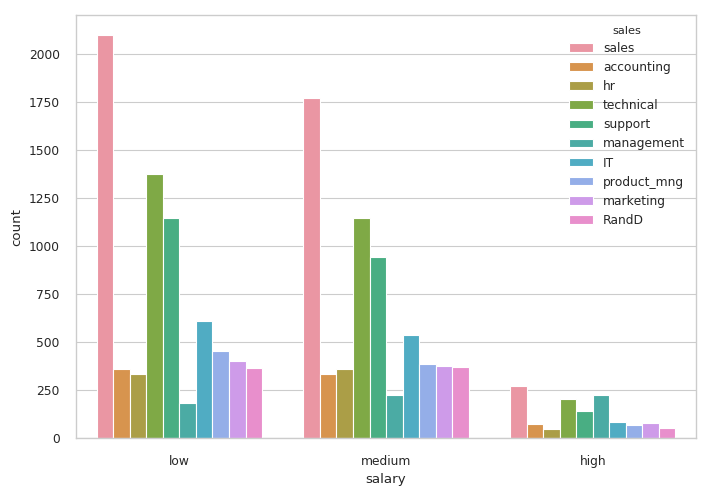

In [9]:
sns.set_style(style='whitegrid')  #darkgrid, whitegrid, dark, white, ticks
sns.set_context(context='paper',font_scale=1) # context : dict, None, or one of {paper, notebook, talk, poster}
sns.set_palette(sns.color_palette("RdBu"))
sns.countplot(x = 'salary',hue = 'sales',data = df) 
# sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs

# plt.title('SALARY')
# plt.xlabel('salary')
#plt.ylabel('number')
#plt.axis([0,4,0,10000])
# plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
# plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.3)
# for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
#   plt.text(x,y,y,ha='center',va = 'bottom')

In [10]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,2,3)


In [11]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


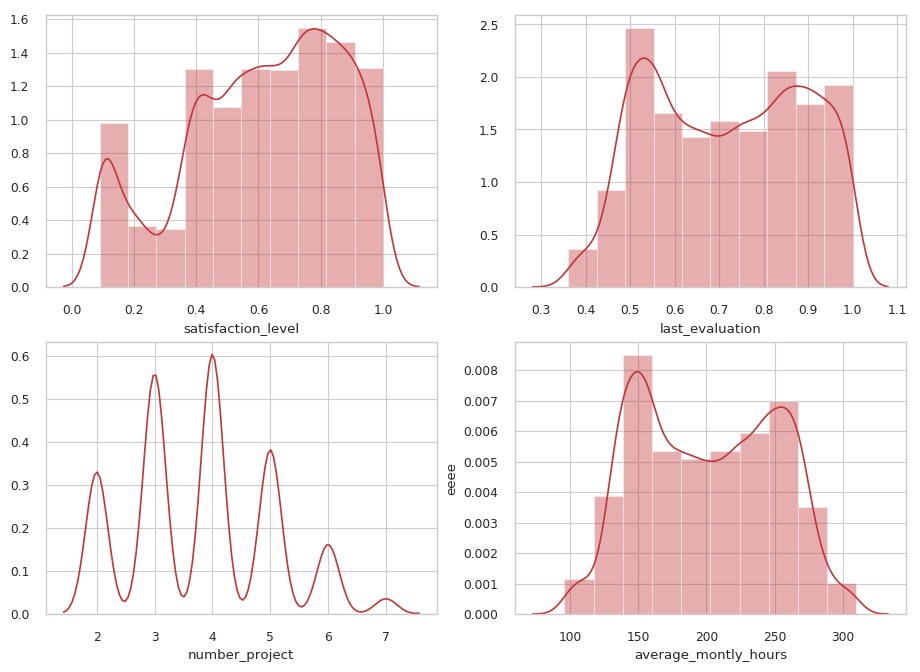

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
sns.distplot(df['satisfaction_level'],bins = 10)
ax2 = fig.add_subplot(2,2,2)
sns.distplot(df['last_evaluation'],bins = 10)
ax3 = fig.add_subplot(2,2,3)
sns.distplot(df['number_project'],bins = np.arange(df['number_project'].min(),df['number_project'].max(),1),hist = False)
plt.subplots_adjust(right = 1.2,top = 1.2)
ax4 = fig.add_subplot(2,2,4)
ax4.set_ylabel('eeee')
sns.distplot(df['average_montly_hours'],bins = 10) #np.arange(df['average_montly_hours'].min(),df['average_montly_hours'].max()+20,20) ,
             # kde = False,axlabel=('Hours'))


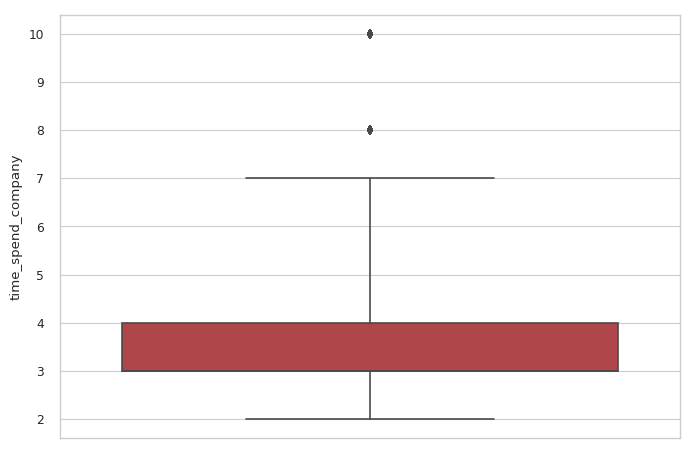

In [13]:
sns.boxplot(y = df['time_spend_company'],  saturation=0.75,  whis=3)


In [14]:
sub_df = df.groupby('time_spend_company').mean()
sub_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years
time_spend_company,,,,,,,
2,0.697078,0.717596,3.687423,200.133169,0.172010,0.016338,0.016646
3,0.626314,0.668721,3.327798,186.632935,0.138910,0.246159,0.020798
4,0.467517,0.767927,4.627689,223.455221,0.124364,0.348064,0.013688
5,0.610305,0.813666,4.519348,222.978955,0.116090,0.565513,0.011541
6,0.603440,0.754875,4.213092,212.051532,0.149025,0.291086,0.023677
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.000000,0.191489
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.000000,0.061728
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.000000,0.074766


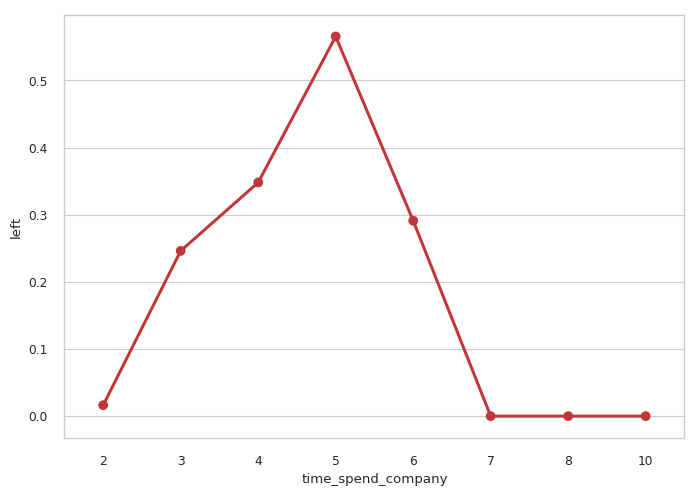

In [15]:
sns.pointplot(sub_df.index,sub_df['left'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


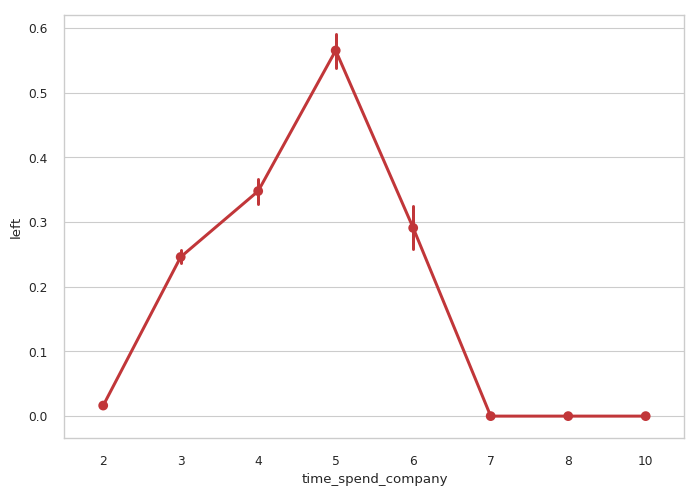

In [16]:
sns.pointplot(x = 'time_spend_company',y = 'left',data = df)

([<matplotlib.patches.Wedge at 0x7fde91b1b5f8>,
 [Text(0.776414318993718, 0.9149758495509712, 'sales'),
  Text(-0.7361690652250792, 0.8173463815333333, 'technical'),
  Text(-1.078295473144608, -0.21743705433031926, 'support'),
  Text(-0.6639038295740627, -0.8770585528212436, 'IT'),
  Text(-0.220711694218203, -1.0776299680480914, 'product_mng'),
  Text(0.1824348726672272, -1.0847661117655236, 'marketing'),
  Text(0.5381184913305728, -0.9593896441426228, 'RandD'),
  Text(0.8166516060190341, -0.7369397223562675, 'accounting'),
  Text(1.004980939261518, -0.4472284782088872, 'hr'),
  Text(1.090437030943069, -0.1447310662852455, 'management')],
 [Text(0.45290835274633545, 0.5337359122380665, '27.6%'),
  Text(-0.40154676285004315, 0.44582529901818174, '18.1%'),
  Text(-0.5881611671697861, -0.11860202963471958, '14.9%'),
  Text(-0.36212936158585235, -0.4783955742661328, '8.2%'),
  Text(-0.12038819684629253, -0.587798164389868, '6.0%'),
  Text(0.09950993054576027, -0.5916906064175583, '5.7%'),


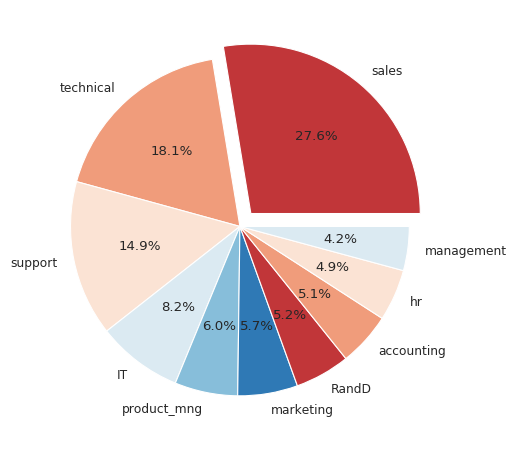

In [17]:
lbs=df['sales'].value_counts().index
explodes = [0.1 if i == 'sales' else 0 for i in lbs]
plt.pie(df['sales'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%',explode=explodes)

([<matplotlib.patches.Wedge at 0x7fdea0acda58>,
 [Text(0.04611030952732935, 1.1991137724816998, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')],
 [Text(0.026897680557608782, 0.6994830339476582, '48.8%'),
  Text(-0.1758950303099873, -0.5736383340679462, '43.0%'),
  Text(0.5799734973153926, -0.1537229404212405, '8.2%')])

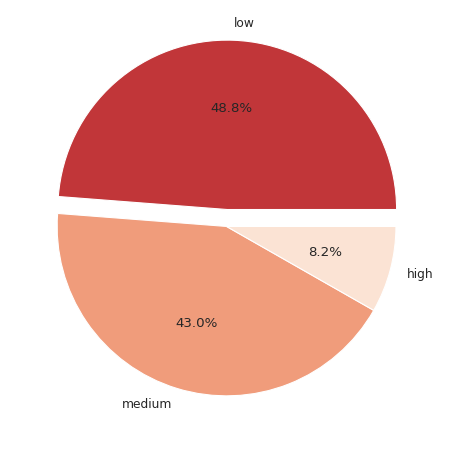

In [18]:
lbs=df['salary'].value_counts().index
explodes = [0.1 if i == 'low' else 0 for i in lbs]
plt.pie(df['salary'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%',explode=explodes)

In [19]:
#import math 

In [20]:
#import scipy.stats as ss#

In [21]:
# norm_dist = ss.norm.rvs(size =20)

In [22]:
# norm_dist

In [23]:
# ss.normaltest(norm_dist) # 基于偏度和峰度的检验法  返回统计值和P值  检验是否正太分布

In [24]:
# ss.chi2_contingency([[15,95],[85,5]]) # 卡方检验

In [25]:
# ss.ttest_ind(ss.norm.rvs(size = 100),ss.norm.rvs(size = 100))

In [26]:
# ss.f_oneway([49,50,52,54,56],[56,54,52,51,48],[54,51,52,48,47]) # 方差检验

In [27]:
#from statsmodels.graphics.api import qqplot
# matplotlib

In [28]:
# plt.show(qqplot(ss.norm.rvs(size = 100)))  # qq图检验分布是否正太分布

In [29]:
# pandas 相关系数
# s1 = pd.Series(np.random.randn(10))
# s2 = pd.Series(np.random.randn(10))

In [30]:
# s1.corr(s2)

In [31]:
# df = pd.DataFrame(np.random.randn(4,14))

In [32]:
# s1.corr(s2,method='spearman')

In [33]:
# s1.corr(s2)

In [34]:
# s1.corr(s2,'kendall')

In [35]:
# df =pd.DataFrame([s1,s2]).T

In [36]:
# df.corr()

In [37]:
# df

In [38]:
# x =np.arange(10).astype(np.float).reshape((10,1))
# y = x*3+4+np.random.random((10,1))

In [39]:
# from sklearn.linear_model import LinearRegression # 线性回归

In [40]:
# reg = LinearRegression() ###线性回归
# res = reg.fit(x,y)# 拟合

In [41]:
# y_pred = reg.predict(x) # 预测值

In [42]:
# y_pred

In [43]:
# reg.coef_  # 参数

In [44]:
# reg.intercept_  # 截距

In [45]:
# PCA变换 主成分分析


In [46]:
#from sklearn.decomposition import  PCA 

In [47]:
# lower_dim = PCA(n_components=1) # 用的是奇异值分解的方法降维

In [48]:
# lower_dim.fit(data)

In [49]:
# lower_dim.explained_variance_ratio_

In [50]:
# lower_dim.fit_transform(data)

In [51]:
#主成分分析PCA

# import pandas as pd
# import numpy as np
# def myPCA(data,n_components = 10000000000):
#     mean_vals = np.mean(data,axis = 0) # 每个属性的均值 针对列
#     mid = data - mean_vals # 
#     cov_mat = np.cov(mid,rowvar = False) # 计算协方差矩阵 rowvar = False 针对列
#     from scipy import linalg # 求协方差矩阵的特征值和特征向量
#     eig_vals,eig_vects = linalg.eig(np.mat(cov_mat)) #eig:计算方阵的特征值和特征向量 mat:将输入解释为矩阵。
#     eig_val_index = np.argsort(eig_vals) # 返回将对数组排序的索引 下标
#     eig_val_index =(eig_val_index[:-(n_components + 1):-1])
#     eig_vects = eig_vects[:,eig_val_index]
#     low_dim_mat = np.dot(mid,eig_vects)
#     return low_dim_mat,eig_vals
# data = np.array([np.array([2.5,1.5,2.2,1.9,3.1,2,3.2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
# print(myPCA(data,n_components=1))

In [52]:
# #交叉分析
# pandas
# numpy
# %matplotlib
# senborn
# scipy.stats


In [53]:
# sales_indices = df.groupby(by = 'sales').indices
# sales_values = df['left'].iloc[sales_indices['sales']].values
# technical_values = df['left'].iloc[sales_indices['technical']].values
# print(ss.ttest_ind(sales_values,technical_values)[1])
# sales_keys = list(sales_indices.keys())
# sales_t_mat =np.zeros([len(sales_keys),len(sales_keys)])
# for i in range(len(sales_keys)):
#     for j in range(len(sales_keys)):
#         p_value = ss.ttest_ind(df['left'].iloc[sales_indices[sales_keys[i]]].values,df['left'].iloc[sales_indices[sales_keys[j]]].values)[1]
#         if p_value < 0.05:
#             sales_t_mat[i][j] = -1
#         else:
#             sales_t_mat[i][j] = p_value
# sns.heatmap(sales_t_mat,xticklabels = sales_keys,yticklabels = sales_keys)

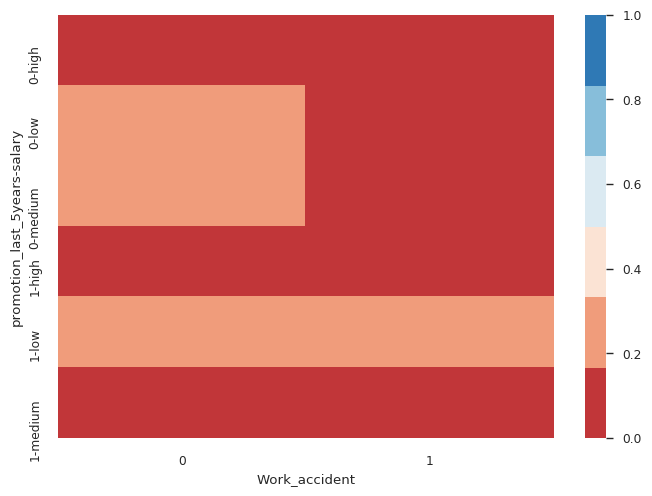

In [54]:
# 透视表
piv_tb = pd.pivot_table(df,values = 'left',index = ['promotion_last_5years','salary'],\
                       columns = ['Work_accident'],aggfunc = np.mean)  #aggfunc 聚合方式 参数 为一个函数

sns.heatmap(piv_tb,vmin = 0, vmax = 1,cmap = sns.color_palette(n_colors = 6)) # cmap 颜色

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


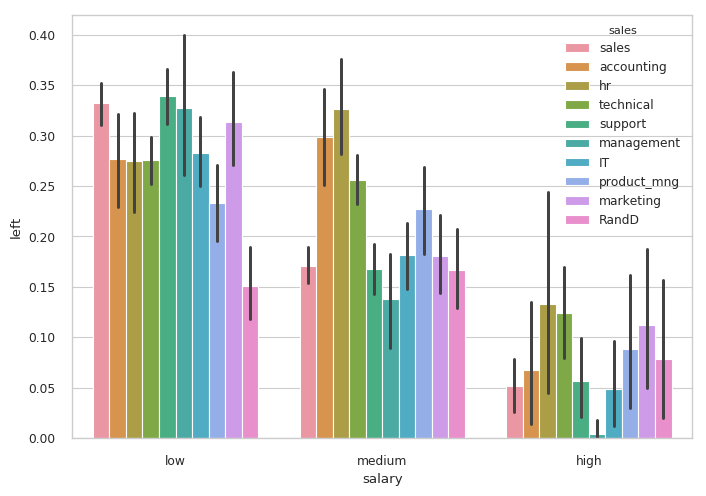

In [55]:
# 分组分析 
# 1 离散值
sns.barplot(x = 'salary',y = 'left',hue = 'sales',data =df)
# 2 连续值


In [56]:
# sns.barplot(list(range(len(df['satisfaction_level']))),df['satisfaction_level'].sort_values())

In [57]:
# 相关系数
# sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.color_palette())

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas_profiling as pdpr
# from sklearn.preprocessing import MinMaxScaler, StandardScaler  # 归一化 标准化
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # 标签编码 独热编码
# from sklearn.preprocessing import Normalizer # 正规化(l1,l2)
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 降维


# s1  : satisfaction_level     --  False:MinMaxScaler, True:StandardScaler
# le  : last_evaluation        --  False:MinMaxScaler, True:StandardScaler
# npr : number_project         --  False:MinMaxScaler, True:StandardScaler
# amh : average_montly_hours   --  False:MinMaxScaler, True:StandardScaler
# tsc : time_spend_company     --  False:MinMaxScaler, True:StandardScaler
# wa  : Work_accident          --  False:MinMaxScaler, True:StandardScaler
# pl5 : promotion_last_5years  --  False:MinMaxScaler, True:StandardScaler
# dep : departmeent  --- False:LableEncoder ,  True:OneHotEncoder
# salary : salary --- False:LableEncoder ,  True:OneHotEncoder


def hr_preprocessing(sl=False, le=False, npr=False, amh=False, tsc=False, wa=False, pl5=False, dep=False, sal=False,low_d=False,low_n=1):
    df = pd.read_csv("../input/HR_comma_sep.csv")
    df.rename(columns={'sales': 'department', 'average_montly_hours': 'average_monthly_hours'}, inplace=True)
    # 1,得到标注
    label = df['left']
    df = df.drop('left', axis=1)
    # 清洗数据
    # df = df.dropna(subset = ['satisfaction_level','last_evaluation'])
    # df = df[df[]]
    # 特征选择
    # 特征处理
    scaler_lst = [sl, le, npr, amh, tsc, wa, pl5]
    column_lst = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
                  'time_spend_company', 'Work_accident', 'promotion_last_5years']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.\
                                                             reshape(-1, 1)).reshape(1, -1)[0]
        else:
            df[column_lst[i]] = StandardScaler().fit_transform(df[column_lst[i]].\
                                                               values.reshape(-1, 1)).reshape(1, -1)[0]
    scaler_lst = [sal, dep]
    column_lst = ['salary', 'department']
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            if column_lst[i] == 'salary':
                df[column_lst[i]] = [map_salary(s) for s in df['salary'].values]
            else:
                df[column_lst[i]] = LabelEncoder().fit_transform(df[column_lst[i]])
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.
                                                                 reshape(-1,1)).reshape(1, -1)[0]
        else:
            df = pd.get_dummies(df, columns=[column_lst[i]])  # pandas 中OneHotEncoder 处理
    if low_d:
        return PCA(n_components=low_n).fit_transform(df.values)
    # return LinearDiscriminantAnalysis(n_components=low_n) LDA 线性判别式分析 降维
    
    return df,label


d = dict([("low", 0), ("medium", 1), ("high", 2)])


def map_salary(s):
    return d.get(s, 0)


def hr_modeling(features,label):
    # 切分训练集和测试集
    from sklearn.model_selection import train_test_split
    f_v = features.values
    l_v = label.values
    X_tt, X_validation, Y_tt, Y_validation   = train_test_split(f_v, l_v, test_size=0.2) #验证集
    X_train, X_test, Y_train, Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))


def main():
    features,label=hr_preprocessing()
    hr_modeling(features,label)
    # print(hr_preprocessing(dep=True, sal=True, low_d=False, ))
    # print(hr_preprocessing(sl=True, le=True, npr=True, amh=True, tsc=True, wa=True, pl5=True, dep=True, sal=True))



if __name__ == "__main__":


    main()


8999 3000 3000


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.

In [60]:
# 熵
# s1 = pd.Series(['x1','x1','x2','x2','x2','x2','x2','x2','x2','x2'])
# s2 = pd.Series(['y1','y1','y2','y2','y1','y2','y2','y2','y2','y2'])
# def getEntropy(s):
#     if not isinstance(s,pd.core.series.Series):
#         s = pd.Series(s)
#     prt_ary = pd.groupby(s,by = s).count().values/float(len(s))
#     return -(np.log2(prt_ary)*prt_ary).sum()
# print('Entropy:',getEntropy(s2))
# def getCondEntropy(s1,s2):
#     d = dict()
#     for i in list(range(len(s1))):
#         d[s1[i]] = d.get(s1[i],[]) + [s2[i]]
#     return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d])
# print('CondEntropy',getCondEntropy(s1,s2))
# def getEntropyGain(s1,s2):
#     return getEntropy(s2)-getCondEntropy(s1,s2)
# print('EntropyGain',getEntropyGain(s2,s1))
# def getEntropyGainRatio(s1,s2):
#     return getEntropyGainRatio(s1,s2)/getEntropy(s2)
# print('EntropyGainRation',getEntropyGainRatio(s2,s1))
# import math
# def getDiscreteCorr(s1,s2):
#     return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1))*getEntropy(s2))
# print('DiscreteCorr',getDiscreteCorr(s2,s1))
# Gini 系数
# def getProbSS(s):
#     if not isinstance(s,pd.core.series.Series):
#         s = pd.Series(s)
#     prt_ary = pd.groupby(s,by = s).count().values/float(len(s))
#     return sum(prt_ary**2)

# def getGini(sq,s2):
#     d = dict()
#     for i in list(range(len(s1))):
#         d[s1[i]] = d.get(s1[i],[]) + [s2[i]]
#         return 1 - sum(([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d]))
# print('Gini',getGini(s2,s1))

In [61]:
# def getEntropyGainRatio(s1,s2):
#     return getEntropyGainRatio(s1,s2)/getEntropy(s2)
# print('EntropyGainRation',getEntropyGainRatio(s2,s1))

In [62]:
#df1 = pd.DataFrame({'a':ss.norm.rvs(size = 10),'b':ss.norm.rvs(size = 10),'c':ss.norm.rvs(size = 10),'d':np.random.randint(low = 0,high = 2,size  = 10)})

In [63]:
# 特征选择

# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# x = df1.loc[:,['a','b','c']]
# y = df1.loc[:,['d']]
# from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel # 特征选择包feature_selection SelectKBest:过滤思想 ,RFE:包裹思想  SelectFromModel:嵌入思想
# skb = SelectKBest( k = 2)
# skb.fit(x,y) #拟合
# skb.transform(x)
# rfe = RFE(estimator = SVR(kernel = 'linear'),n_features_to_select=2,step = 1)
# rfe.fit_transform(x,y)
# sfm =SelectFromModel(estimator = DecisionTreeRegressor(),threshold=0.1)  # threshold重要因子低于多岁被去掉  需要feature_importances_ 有这个模型才能用
# sfm.fit_transform(x,y)

In [64]:
# lst1 = [6,10,23,45,67,12,25,31,43,60,83]
# pd.qcut(lst1,q = 3,labels = ['low','medium','high']) # 等深


In [65]:
# pd.cut(lst1,bins = 3) # 等距

In [66]:
# # 归一化 和标准化
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# MinMaxScaler().fit_transform(np.array([1,4,10,15,21]).reshape(-1,1)) # 归一化 o---1之间
# StandardScaler().fit_transform(np.array([1,0,0,0,0,0,0,0,0]).reshape(-1,1))# 标准化 均值为0 标准差为1

In [67]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # 归一化
# LabelEncoder().fit_transform(np.array(['down','up','up','down','med','dog']).reshape(-1,1))

In [68]:
# OneHotEnconder 独热编码
# lb_encoder = LabelEncoder()
# lb_tran_f = lb_encoder.fit_transform(np.array(['red','yellow','blue','green']))
# oht_enconder = OneHotEncoder().fit(lb_tran_f.reshape(-1,1))
# oht_enconder.transform(lb_encoder.transform(np.array(['yellow','blue','green','green','red'])).reshape(-1,1)).toarray()

In [69]:
# from sklearn.preprocessing import Normalizer  # 正规化
# Normalizer(norm = 'l2').fit_transform(np.array([[1,1,3,-1,2]]))
# Normalizer(norm = 'l1').fit_transform(np.array([[1,1,3,-1,2]]))
# # LDA降维 Linear Discriminant Analysis 线性判别式分析
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# x = np.array([[-1,1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
# y = np.array([1,1,1,2,2,2])
# LinearDiscriminantAnalysis(n_components = 1).fit_transform(x,y)
# clf = LinearDiscriminantAnalysis(n_components = 1).fit(x,y) # fisher clssfile 分类器
# clf.predict([[0.8,1]])